In [1]:
!pip install qiskit 
!pip install qiskit-experiments
!pip install matplotlib==3.1.3
!pip install pylatexenc
from IPython.display import clear_output
clear_output(wait=False)

In [2]:
from qiskit import *
import numpy as np
import matplotlib.ticker as tck
from qiskit.visualization import plot_state_city
import qiskit.quantum_info as qi
from qiskit_experiments.library import StateTomography
import matplotlib.pyplot as plt

# For simulation
from qiskit.providers.aer import AerSimulator
from qiskit.providers.fake_provider import FakeParis

# Noisy simulator backend
backend = AerSimulator.from_backend(FakeParis())

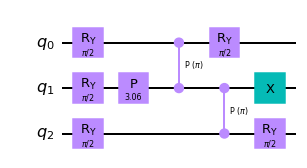

In [3]:
phi = np.arange(0, 2 * np.pi, 0.2)
theta = np.pi/2
fid_list = []
for angle in phi : 
  qc = QuantumCircuit(3)
  qc.ry(theta, [0,1,2])
  qc.p(angle - np.pi,1)
  qc.cp(np.pi, [0,1], [1,2])
  qc.ry(theta, [0,2])
  qc.x(1)
  #qc.draw()

  # QST Experiment
  qstexp1 = StateTomography(qc)
  qstdata1 = qstexp1.run(backend, seed_simulation=100).block_for_results()
  state_result = qstdata1.analysis_results("state")
  fid_result = qstdata1.analysis_results("state_fidelity")
  fid_list.append(fid_result.value)
qc.draw(output='mpl')


In [4]:
w = [0.75] * len(phi)
bi = [0.5] * len(phi)

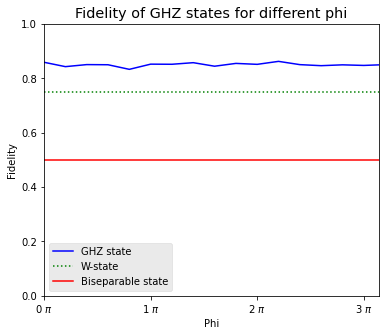

In [5]:
f,ax=plt.subplots(figsize=(6,5))

ax.plot(phi, fid_list, color='b',label='GHZ state')

ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=1.0))

plt.style.use("ggplot")
plt.plot(phi, w, color='g', label='W-state',linestyle='dotted')
plt.plot(phi, bi, color='r', label='Biseparable state')
plt.xlabel("Phi")
plt.ylabel("Fidelity")
plt.title("Fidelity of GHZ states for different phi")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
plt.ylim(0,1) 
plt.xlim(0, np.pi)

plt.show()